In [1]:
! pip install PyMySQL

In [2]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt

In [3]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [4]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [5]:
font.get_name()

'NanumGothic'

In [6]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

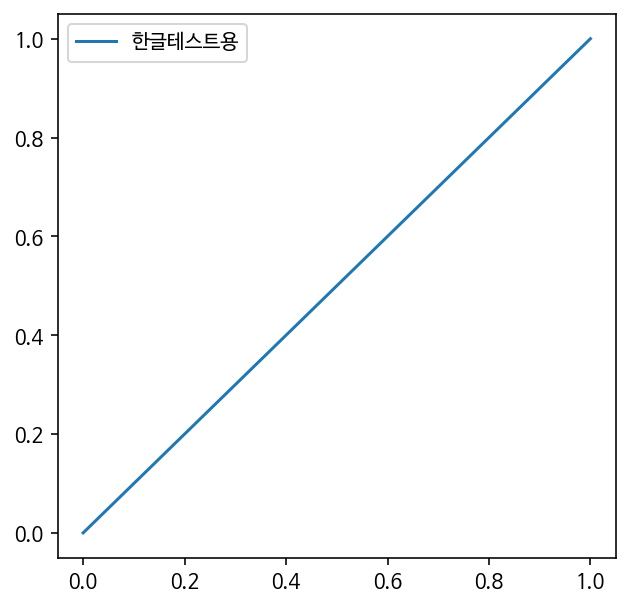

In [7]:
#그래프 그림 (가로 5 세로5)
plt.figure(figsize=(5,5))
#X ,Y 좌표 설정
plt.plot([0,1], [0,1], label='한글테스트용')
#범례 표시
plt.legend()
#그래프 그림
plt.show()

In [8]:
import pymysql.cursors
import pandas as pd
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )
cursor = connection.cursor()

In [73]:
# 실행할 SQL 쿼리
# 삼성전자의 2019~2020년 주가 조회
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM, T1.EX_CD
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,M5_PRC , M10_PRC, M20_PRC
              , T3.FIN_ITM_VAL
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      INNER JOIN FINANCE_Y T3
      ON (T2.STK_CD = T3.STK_CD)
      WHERE T1.SEC_NM = '반도체'
      AND T1.EX_CD = 'KP'
      AND T2.DT >= '2019-01-01'
      AND T2.DT < '2021-01-01'
      AND T3.FIN_ITM_NM = '주당순이익'
      AND (T3.YY = '2018' or T3.YY = '2019');
"""  

In [74]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)
result = cursor.fetchall()

# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [75]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

8864

In [76]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [36]:
# PER 비교를 위해 5개 회사의 값 추출
df_1 = pd.DataFrame(df.loc[df['STK_NM'] == 'SK하이닉스'])
df_2 = pd.DataFrame(df.loc[df['STK_NM'] == '서울반도체'])
df_3 = pd.DataFrame(df.loc[df['STK_NM'] == '삼성전자'])
df_4 = pd.DataFrame(df.loc[df['STK_NM'] == 'DB하이텍'])
df_5 = pd.DataFrame(df.loc[df['STK_NM'] == '한미반도체'])

# DT 컬럼을 날짜와 시간 타입으로 변환
df_1["DT"] = pd.to_datetime(df_1["DT"])
df_2["DT"] = pd.to_datetime(df_2["DT"])
df_3["DT"] = pd.to_datetime(df_3["DT"])
df_4["DT"] = pd.to_datetime(df_4["DT"])
df_5["DT"] = pd.to_datetime(df_5["DT"])

# O_PRC 컬럼부터 마지막 컬럼까지 정수로 변환
df_1.loc[: , "O_PRC":] = df_1.loc[: , "O_PRC":].astype(int)
df_2.loc[: , "O_PRC":] = df_2.loc[: , "O_PRC":].astype(int)
df_3.loc[: , "O_PRC":] = df_3.loc[: , "O_PRC":].astype(int)
df_4.loc[: , "O_PRC":] = df_4.loc[: , "O_PRC":].astype(int)
df_5.loc[: , "O_PRC":] = df_5.loc[: , "O_PRC":].astype(int)

# 종가/주당순이익 으로 PER 계산
df_1["PER"] = df_1["C_PRC"] / df_1["FIN_ITM_VAL"]
df_2["PER"] = df_2["C_PRC"] / df_2["FIN_ITM_VAL"]
df_3["PER"] = df_3["C_PRC"] / df_3["FIN_ITM_VAL"]
df_4["PER"] = df_4["C_PRC"] / df_4["FIN_ITM_VAL"]
df_5["PER"] = df_5["C_PRC"] / df_5["FIN_ITM_VAL"]

Text(0.5, 1.0, '5가지 제약회사 PER')

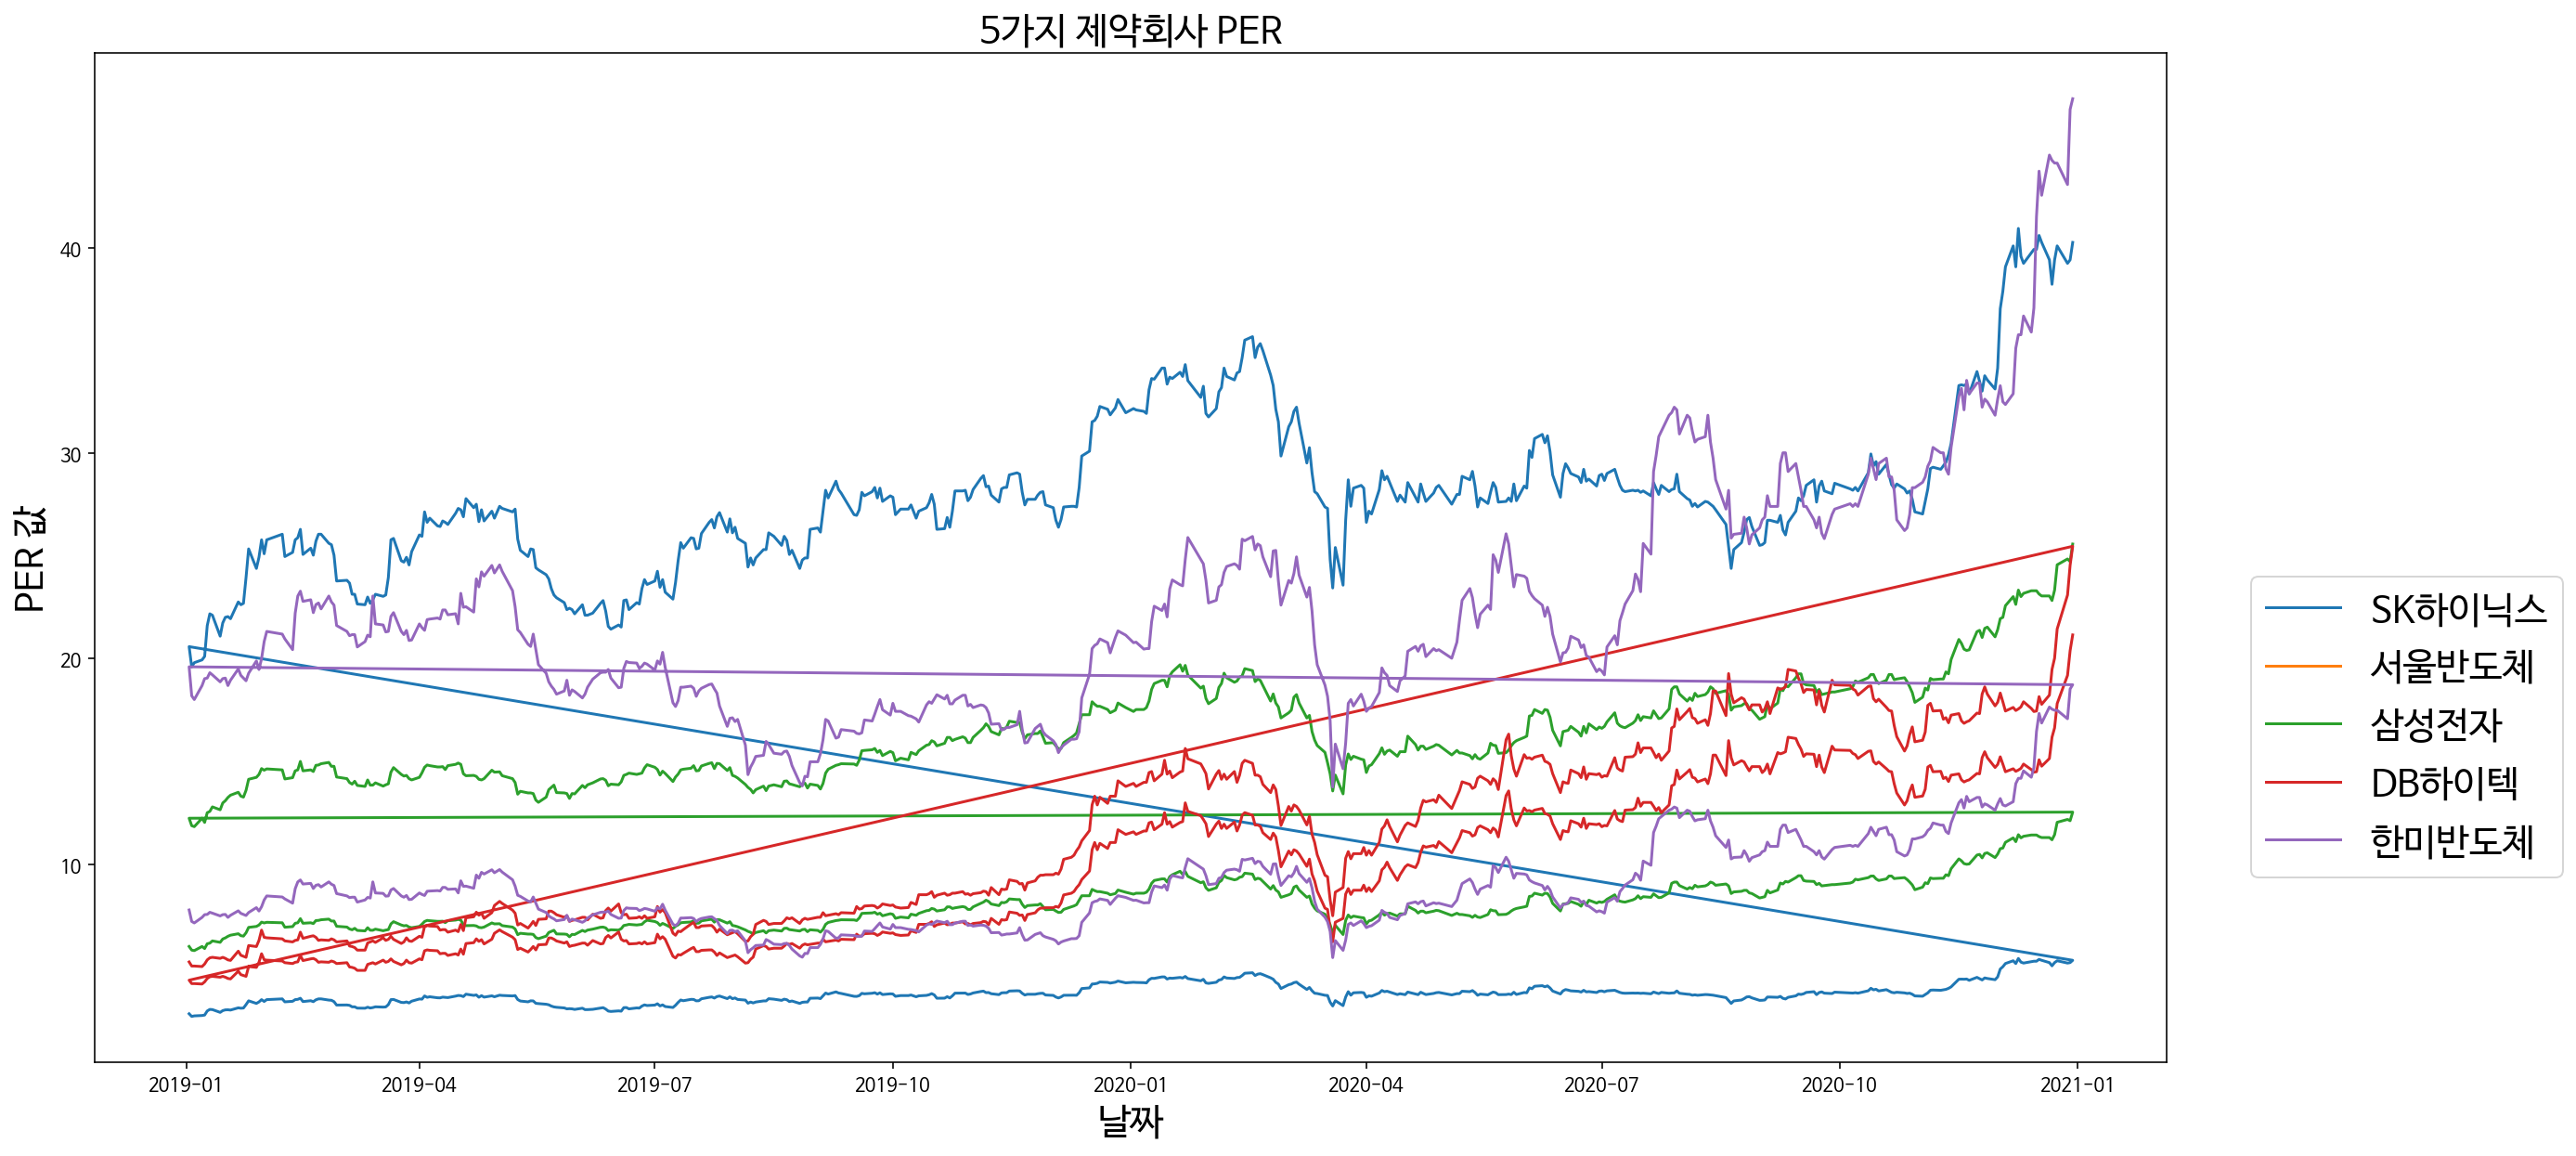

In [85]:
#PER 그래프를 추가하고 범례 
plt.figure(figsize=(20,10))
plt.plot(df_1['DT'], df_1['PER'], label = 'SK하이닉스')
plt.plot(df_2['DT'], df_2['PER'], label = '서울반도체')
plt.plot(df_3['DT'], df_3['PER'], label = '삼성전자')
plt.plot(df_4['DT'], df_4['PER'], label = 'DB하이텍')
plt.plot(df_5['DT'], df_5['PER'], label = '한미반도체')

plt.legend(bbox_to_anchor=(1.2, 0.5), fontsize = 20)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("PER 값", fontsize = 20)
plt.title("5가지 제약회사 PER", fontsize = 20)